In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import sys
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
from keras.models import load_model

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [3]:
CNN_model = load_model("/gdrive/MyDrive/504/CNN.h5")

In [9]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to /gdrive/MyDrive/504/photo.jpg


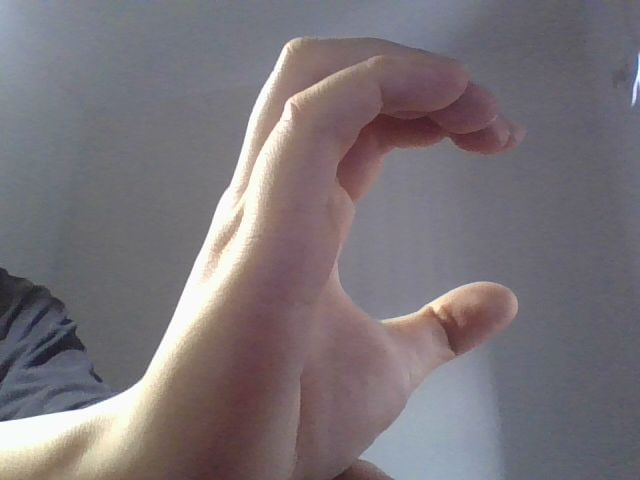

In [22]:
from IPython.display import Image
try:
  filename = take_photo("/gdrive/MyDrive/504/photo.jpg")
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [23]:
img = cv2.imread("/gdrive/MyDrive/504/photo.jpg")
print(img.shape)
img_width = img.shape[1]
img_height = img.shape[0]
cut_point1 = int((img_width - img_height ) / 2) - 1
cut_point2 = int((img_width + img_height ) / 2)
#cut_point1 = int((img_height - img_width ) / 2) - 1
#cut_point2 = int((img_width + img_height ) / 2)
img = img[:, cut_point1:cut_point2 ,:]
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(28,28))
cv2_imshow(img)
img = img.reshape(-1,28,28,1)
y_pred = CNN_model.predict(img)
print(y_pred)
num = np.nonzero(y_pred)[1]
print(num)
if num <= 8:
  print(chr(num + 65))
else:
  print(chr(num + 66))

(480, 640, 3)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[15]
Q


In [ ]:
### Setting the number of the camera
img = cv2.imread("/gdrive/MyDrive/504/photo.jpg)
### Setting the resolusion of the camera (720p)
pic_width = 1280
pic_height = 720
cut_point1 = int((pic_width - pic_height ) / 2) - 1
cut_point2 = int((pic_width + pic_height ) / 2)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, pic_width)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, pic_height)

while 1:
    ret, frame = cap.read()
    
    
    ####################################################
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.resize(frame,(28,28))
    ####################################################
    
    cv2_imshow('video', frame)
    key = cv2.waitKey(1)
    ### Press Esc to quit detecting
    if key == 27:
        break
        
        

cap.release()
cv2.destroyAllWindows()        

TypeError: ignored